In [1]:
#分析用
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import math


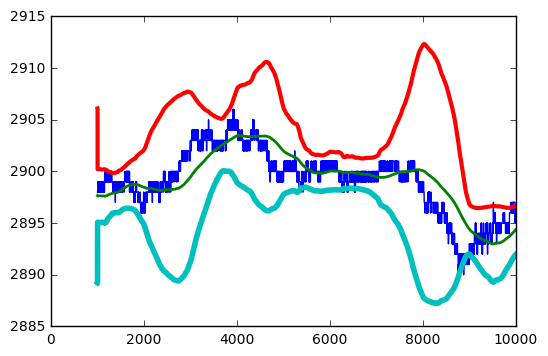

In [228]:
#读取文件，读取当前的最新价
#c = np.loadtxt("./20161214/m1705.csv",delimiter=",",usecols=(4,),unpack=True)
c = np.loadtxt("./m/20170309_m1705.csv",delimiter=",",usecols=(4,),unpack=True)
#截取c的一段长度
#前一千个用来统计，没有数据
N = 1000
c = c[0:10000]
#一个名为sma的数组，包含了简单移动平均线的数据
#定义权重
weights = np.ones(N)/N
sma = np.convolve(weights,c)[N-1:-N+1]
deviation = []
C = len(c)
for i in range(N-1,C):
    if i+N <C:
        dev = c[i:i+N]
    else:
        dev = c[-N:]
    averages = np.zeros(N)
    averages.fill(sma[i-N-1])
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
deviation = 2 * np.array(deviation)
upperBB = sma + deviation
lowerBB = sma - deviation
#绘制布林带
t = np.arange(N-1,C)
c_slice = c[N-1:]
plt.plot(t,c_slice,lw=1.0)
plt.plot(t,sma,lw=2.0)
plt.plot(t,upperBB,lw=3.0)
plt.plot(t,lowerBB,lw=4.0)
plt.show()

In [229]:
#数据按时间段分开存放
# 21:00:00 -- 21:30:00  0
tick_list0 = []
# 21:30:00 -- 22:00:00  1
tick_list1 = []
# 22:00:00 -- 22:30:00  2
tick_list2 = []
# 22:30:00 -- 23:00:00  3
tick_list3 = []
# 23:00:00 -- 23:30:00  4
tick_list4 = []
# 9:00:00 -- 9:30:00    5
tick_list5 = []
# 9:30:00 -- 10:00:00   6
tick_list6 = []
# 10:00:00 -- 10:30:00  7
tick_list7 = []
# 10:30:00 -- 11:00:00  8
tick_list8 = []
# 11:00:00 -- 11:30:00  9
tick_list9 = []
# 13:30:00 -- 14:30:00  10
tick_list10 = []
# 14:00:00 -- 14:30:00  11
tick_list11 = []
# 14:30:00 -- 15:00:00  12
tick_list12 = []
#python逐行读文件
#f = open("./20161214/m1709.csv")       
f = open("./m/20170309_m1705.csv")
line = f.readline()
#行号记录
index = 0;
while line:  
    #print index       
    #print line
    #每行进行split操作，分隔符是","
    line_data_list = line.split(",")
    #获取时间字符串
    time_string = line_data_list[20] 
    #将时间字符串，进行split操作，%H:%M:%S
    time_list = time_string.split(":")
    
    #定义需要包含的各项数据，从每行tick数据选取
    #获取最新价格
    new_price = int(line_data_list[4])
    #获取数量
    volume = int(line_data_list[11])
    #获取持仓量
    open_interest = int(line_data_list[13])
    #获取持仓量
    #print new_price
    #半个小时一统计
    if time_list[0] == '21':
        # 21:00:00 -- 21:30:00  0
        if time_list[1] < '30': 
            #print time_list
            tick_list0.append([new_price,volume,open_interest])
        # 21:30:00 -- 22:00:00  1
        else:
            #print time_list[1]
            tick_list1.append([new_price,volume,open_interest])
    if time_list[0] == '22':
        # 22:00:00 -- 22:30:00  2
        if time_list[1] < '30': 
            #print time_list
            tick_list2.append([new_price,volume,open_interest])
        # 22:30:00 -- 23:00:00  3
        else:
            #print time_list     
            tick_list3.append([new_price,volume,open_interest])
    if time_list[0] == '23':
        # 23:00:00 -- 23:30:00  4
        #print time_list
        tick_list4.append([new_price,volume,open_interest])
    if time_list[0] == '09':
        # 9:00:00 -- 9:30:00    5
        if time_list[1] < '30': 
            #print time_list
            tick_list5.append([new_price,volume,open_interest])
        # 9:30:00 -- 10:00:00   6
        else:
            #print time_list
            tick_list6.append([new_price,volume,open_interest])
    if time_list[0] == '10':
        # 10:00:00 -- 10:30:00  7
        if time_list[1] < '30': 
            #print time_list
            tick_list7.append([new_price,volume,open_interest])
        # 10:30:00 -- 11:00:00  8
        else:
            #print time_list 
            tick_list8.append([new_price,volume,open_interest])
    if time_list[0] == '11':
        # 11:00:00 -- 11:30:00  9
        #print time_list
        tick_list9.append([new_price,volume,open_interest])
    if time_list[0] == '13':
        # 13:30:00 -- 14:30:00  10
        #print time_list
        tick_list10.append([new_price,volume,open_interest])
    if time_list[0] == '14':
        # 14:00:00 -- 14:30:00  11
        if time_list[1] < '30': 
            #print time_list
            tick_list11.append([new_price,volume,open_interest])
        # 14:30:00 -- 15:00:00  12
        else:
            #print time_list 
            tick_list12.append([new_price,volume,open_interest])
    line = f.readline()  
    index = index + 1;
f.close()
#print tick_list0
#打印list的长度
print "0:",len(tick_list0),",1:",len(tick_list1),",2:",len(tick_list2),",3:",len(tick_list3),",4:",len(tick_list4),"5:",len(tick_list5) \
        ,"6:",len(tick_list6),"7:",len(tick_list7),",8:",len(tick_list8),",9:",len(tick_list9),",10:",len(tick_list10) \
        ,",11:",len(tick_list11),",12:",len(tick_list12)
#list转成numpy.array
#tick_array0 = np.array(tick_list0)
#print tick_array0,tick_array0.shape
#获取第一个和最后一个元素
#print tick_array0[0],tick_array0[len(tick_array0)-1]

#定义最终的数据结构，每30分钟分段，一天一共有13个分区，即13行。列名为开盘价，最高价，最低价，收盘价，成交量变化，持仓量变化,6行
df = pd.DataFrame(np.zeros(78).reshape(13,6),columns=['openprice','highestprice','lowestprice','closeprice','volume','openinterest'])
#print df
#根据选择的数据构造dataframe
tick_pd0 = pd.DataFrame(tick_list0,columns=['price','volume','openinterest'])
tick_pd1 = pd.DataFrame(tick_list1,columns=['price','volume','openinterest'])
tick_pd2 = pd.DataFrame(tick_list2,columns=['price','volume','openinterest'])
tick_pd3 = pd.DataFrame(tick_list3,columns=['price','volume','openinterest'])
tick_pd4 = pd.DataFrame(tick_list4,columns=['price','volume','openinterest'])
tick_pd5 = pd.DataFrame(tick_list5,columns=['price','volume','openinterest'])
tick_pd6 = pd.DataFrame(tick_list6,columns=['price','volume','openinterest'])
tick_pd7 = pd.DataFrame(tick_list7,columns=['price','volume','openinterest'])
tick_pd8 = pd.DataFrame(tick_list8,columns=['price','volume','openinterest'])
tick_pd9 = pd.DataFrame(tick_list9,columns=['price','volume','openinterest'])
tick_pd10 = pd.DataFrame(tick_list10,columns=['price','volume','openinterest'])
tick_pd11 = pd.DataFrame(tick_list11,columns=['price','volume','openinterest'])
tick_pd12 = pd.DataFrame(tick_list12,columns=['price','volume','openinterest'])
#print tick_pd0
#print tick_pd0['price'][len(tick_list0)-1]
#第0行
tick_pd0_length = len(tick_list0)
df['openprice'].ix[0] = tick_pd0['price'].ix[0]
df['closeprice'].ix[0] = tick_pd0['price'].ix[tick_pd0_length-1]
df['highestprice'].ix[0] = tick_pd0['price'].max()
df['lowestprice'].ix[0] = tick_pd0['price'].min()
df['volume'].ix[0] = tick_pd0['volume'].ix[tick_pd0_length-1] - tick_pd0['volume'].ix[0]
df['openinterest'].ix[0] = tick_pd0['openinterest'].ix[tick_pd0_length-1] - tick_pd0['openinterest'].ix[0]
#第1行
tick_pd1_length = len(tick_list1)
df['openprice'].ix[1] = tick_pd1['price'].ix[0]
df['closeprice'].ix[1] = tick_pd1['price'].ix[tick_pd1_length-1]
df['highestprice'].ix[1] = tick_pd1['price'].max()
df['lowestprice'].ix[1] = tick_pd1['price'].min()
df['volume'].ix[1] = tick_pd1['volume'].ix[tick_pd1_length-1] - tick_pd1['volume'].ix[0]
df['openinterest'].ix[1] = tick_pd1['openinterest'].ix[tick_pd1_length-1] - tick_pd1['openinterest'].ix[0]
#第2行
tick_pd2_length = len(tick_list2)
df['openprice'].ix[2] = tick_pd2['price'].ix[0]
df['closeprice'].ix[2] = tick_pd2['price'].ix[tick_pd2_length-1]
df['highestprice'].ix[2] = tick_pd2['price'].max()
df['lowestprice'].ix[2] = tick_pd2['price'].min()
df['volume'].ix[2] = tick_pd2['volume'].ix[tick_pd2_length-1] - tick_pd2['volume'].ix[0]
df['openinterest'].ix[2] = tick_pd2['openinterest'].ix[tick_pd2_length-1] - tick_pd2['openinterest'].ix[0]
#第3行
tick_pd3_length = len(tick_list3)
df['openprice'].ix[3] = tick_pd3['price'].ix[0]
df['closeprice'].ix[3] = tick_pd3['price'].ix[tick_pd3_length-1]
df['highestprice'].ix[3] = tick_pd3['price'].max()
df['lowestprice'].ix[3] = tick_pd3['price'].min()
df['volume'].ix[3] = tick_pd3['volume'].ix[tick_pd3_length-1] - tick_pd3['volume'].ix[0]
df['openinterest'].ix[3] = tick_pd3['openinterest'].ix[tick_pd3_length-1] - tick_pd3['openinterest'].ix[0]
#第4行
tick_pd4_length = len(tick_list4)
df['openprice'].ix[4] = tick_pd4['price'].ix[0]
df['closeprice'].ix[4] = tick_pd4['price'].ix[tick_pd4_length-1]
df['highestprice'].ix[4] = tick_pd4['price'].max()
df['lowestprice'].ix[4] = tick_pd4['price'].min()
df['volume'].ix[4] = tick_pd4['volume'].ix[tick_pd4_length-1] - tick_pd4['volume'].ix[0]
df['openinterest'].ix[4] = tick_pd4['openinterest'].ix[tick_pd4_length-1] - tick_pd4['openinterest'].ix[0]
#第5行
tick_pd5_length = len(tick_list5)
df['openprice'].ix[5] = tick_pd5['price'].ix[0]
df['closeprice'].ix[5] = tick_pd5['price'].ix[tick_pd5_length-1]
df['highestprice'].ix[5] = tick_pd5['price'].max()
df['lowestprice'].ix[5] = tick_pd5['price'].min()
df['volume'].ix[5] = tick_pd5['volume'].ix[tick_pd5_length-1] - tick_pd5['volume'].ix[0]
df['openinterest'].ix[5] = tick_pd5['openinterest'].ix[tick_pd5_length-1] - tick_pd5['openinterest'].ix[0]
#第6行
tick_pd6_length = len(tick_list6)
df['openprice'].ix[6] = tick_pd6['price'].ix[0]
df['closeprice'].ix[6] = tick_pd6['price'].ix[tick_pd6_length-1]
df['highestprice'].ix[6] = tick_pd6['price'].max()
df['lowestprice'].ix[6] = tick_pd6['price'].min()
df['volume'].ix[6] = tick_pd6['volume'].ix[tick_pd6_length-1] - tick_pd6['volume'].ix[0]
df['openinterest'].ix[6] = tick_pd6['openinterest'].ix[tick_pd6_length-1] - tick_pd6['openinterest'].ix[0]
#第7行
tick_pd7_length = len(tick_list7)
df['openprice'].ix[7] = tick_pd7['price'].ix[0]
df['closeprice'].ix[7] = tick_pd7['price'].ix[tick_pd7_length-1]
df['highestprice'].ix[7] = tick_pd7['price'].max()
df['lowestprice'].ix[7] = tick_pd7['price'].min()
df['volume'].ix[7] = tick_pd7['volume'].ix[tick_pd7_length-1] - tick_pd7['volume'].ix[0]
df['openinterest'].ix[7] = tick_pd7['openinterest'].ix[tick_pd7_length-1] - tick_pd7['openinterest'].ix[0]
#第8行
tick_pd8_length = len(tick_list8)
df['openprice'].ix[8] = tick_pd8['price'].ix[0]
df['closeprice'].ix[8] = tick_pd8['price'].ix[tick_pd8_length-1]
df['highestprice'].ix[8] = tick_pd8['price'].max()
df['lowestprice'].ix[8] = tick_pd8['price'].min()
df['volume'].ix[8] = tick_pd8['volume'].ix[tick_pd8_length-1] - tick_pd8['volume'].ix[0]
df['openinterest'].ix[8] = tick_pd8['openinterest'].ix[tick_pd8_length-1] - tick_pd8['openinterest'].ix[0]
#第9行
tick_pd9_length = len(tick_list9)
df['openprice'].ix[9] = tick_pd9['price'].ix[0]
df['closeprice'].ix[9] = tick_pd9['price'].ix[tick_pd9_length-1]
df['highestprice'].ix[9] = tick_pd9['price'].max()
df['lowestprice'].ix[9] = tick_pd9['price'].min()
df['volume'].ix[9] = tick_pd9['volume'].ix[tick_pd9_length-1] - tick_pd9['volume'].ix[0]
df['openinterest'].ix[9] = tick_pd9['openinterest'].ix[tick_pd9_length-1] - tick_pd9['openinterest'].ix[0]
#第10行
tick_pd10_length = len(tick_list10)
df['openprice'].ix[10] = tick_pd10['price'].ix[0]
df['closeprice'].ix[10] = tick_pd10['price'].ix[tick_pd10_length-1]
df['highestprice'].ix[10] = tick_pd10['price'].max()
df['lowestprice'].ix[10] = tick_pd10['price'].min()
df['volume'].ix[10] = tick_pd10['volume'].ix[tick_pd10_length-1] - tick_pd10['volume'].ix[0]
df['openinterest'].ix[10] = tick_pd10['openinterest'].ix[tick_pd10_length-1] - tick_pd10['openinterest'].ix[0]
#第11行
tick_pd11_length = len(tick_list11)
df['openprice'].ix[11] = tick_pd11['price'].ix[0]
df['closeprice'].ix[11] = tick_pd11['price'].ix[tick_pd11_length-1]
df['highestprice'].ix[11] = tick_pd11['price'].max()
df['lowestprice'].ix[11] = tick_pd11['price'].min()
df['volume'].ix[11] = tick_pd11['volume'].ix[tick_pd11_length-1] - tick_pd11['volume'].ix[0]
df['openinterest'].ix[11] = tick_pd11['openinterest'].ix[tick_pd11_length-1] - tick_pd11['openinterest'].ix[0]
#第12行
tick_pd12_length = len(tick_list12)
df['openprice'].ix[12] = tick_pd12['price'].ix[0]
df['closeprice'].ix[12] = tick_pd12['price'].ix[tick_pd12_length-1]
df['highestprice'].ix[12] = tick_pd12['price'].max()
df['lowestprice'].ix[12] = tick_pd12['price'].min()
df['volume'].ix[12] = tick_pd12['volume'].ix[tick_pd12_length-1] - tick_pd12['volume'].ix[0]
df['openinterest'].ix[12] = tick_pd12['openinterest'].ix[tick_pd12_length-1] - tick_pd12['openinterest'].ix[0]
print df

f.close()  


0: 3339 ,1: 2898 ,2: 2873 ,3: 3351 ,4: 2714 5: 3375 6: 3068 7: 1244 ,8: 2876 ,9: 2605 ,10: 2897 ,11: 2662 ,12: 2931
    openprice  highestprice  lowestprice  closeprice    volume  openinterest
0      2901.0        2904.0       2894.0      2903.0  144266.0        4350.0
1      2903.0        2906.0       2898.0      2899.0   56336.0        1312.0
2      2899.0        2901.0       2890.0      2893.0   63116.0       -4104.0
3      2894.0        2907.0       2892.0      2904.0  137308.0        8450.0
4      2904.0        2906.0       2901.0      2902.0   51270.0       -1932.0
5      2900.0        2906.0       2887.0      2891.0  145850.0       -5802.0
6      2892.0        2909.0       2890.0      2905.0  104438.0      -20506.0
7      2905.0        2906.0       2901.0      2901.0   16548.0       -2968.0
8      2901.0        2903.0       2896.0      2896.0   52702.0       -1936.0
9      2896.0        2900.0       2894.0      2898.0   51300.0         234.0
10     2897.0        2904.0       289

In [230]:
df.ix[0:4]

openprice  highestprice  lowestprice  closeprice    volume  openinterest
0     2901.0        2904.0       2894.0      2903.0  144266.0        4350.0
1     2903.0        2906.0       2898.0      2899.0   56336.0        1312.0
2     2899.0        2901.0       2890.0      2893.0   63116.0       -4104.0
3     2894.0        2907.0       2892.0      2904.0  137308.0        8450.0
4     2904.0        2906.0       2901.0      2902.0   51270.0       -1932.0

In [231]:
#每 roll_n 个滚动一次进行计算
roll_n = 2;
#前五个结束后
start0 = df.ix[5:6]
#最高价的最高价 HH
HH = start0['highestprice'].max()
#收盘价的最低价 LC
LC = start0['closeprice'].min()
#收盘价的最高价 HC
HC = start0['closeprice'].max()
#最低价的最低价 LL
LL = start0['lowestprice'].min()
print HH-LC,HC-LL

# K * max(HH-LC,HC-LL)
range_kmax = 0;
#openprice 
openprice_list = df['openprice'].ix[roll_n-1:12]
#print openprice_list
#openprice +- range
range_list = []
for i in range(13-roll_n+1):  #python的range不包括最后一个
    start0 = df.ix[i:i+roll_n-1]
    HH = start0['highestprice'].max()
    #收盘价的最低价 LC
    LC = start0['closeprice'].min()
    #收盘价的最高价 HC
    HC = start0['closeprice'].max()
    #最低价的最低价 LL
    LL = start0['lowestprice'].min()
    #print max(HH-LC,HC-LL),HH-LC,HC-LL,int(max(HH-LC,HC-LL)/3)
    range_kmax = int(max(HH-LC,HC-LL)/3)
    #print openprice_list.ix[i]+range_kmax,openprice_list.ix[i]-range_kmax
    #print range_kmax
    #print i 
    #print openprice_list.ix[i+1]+range_kmax,openprice_list.ix[i+1]-range_kmax
    range_list.append([openprice_list.ix[i+1]+range_kmax,openprice_list.ix[i+1]-range_kmax])
print range_list

18.0 18.0
[[2907.0, 2899.0], [2903.0, 2895.0], [2898.0, 2890.0], [2909.0, 2899.0], [2906.0, 2894.0], [2898.0, 2886.0], [2910.0, 2900.0], [2904.0, 2898.0], [2898.0, 2894.0], [2899.0, 2895.0], [2898.0, 2894.0], [2897.0, 2895.0]]


In [232]:
#回测
#标志 -1 0 1
position = [0,0]
#sleep 止盈和止损之后，是否能再次开单
sleep = 1
#python逐行读文件
#f2 = open("./20161214/m1709.csv")   
f2 = open("./m/20170309_m1705.csv")
line2 = f2.readline()

#行号记录
index2 = 0;
while line2:  
    #print index       
    #print line
    #每行进行split操作，分隔符是","
    line_data_list = line2.split(",")
    #获取时间字符串
    time_string = line_data_list[20] 
    #将时间字符串，进行split操作，%H:%M:%S
    time_list = time_string.split(":")
    
    #定义需要包含的各项数据，从每行tick数据选取
    #获取最新价格
    new_price = int(line_data_list[4])
    #获取数量
    volume = int(line_data_list[11])
    #获取持仓量
    open_interest = int(line_data_list[13])
    #买一价
    if line_data_list[22] != '':
        bidprice1 = int(line_data_list[22])
    #卖一量
    if line_data_list[23] != '':
        bidvolume1 = int(line_data_list[23])
    #卖一价
    if line_data_list[24] != '':
        askprice1 = int(line_data_list[24])
    #卖一量
    if line_data_list[25] != '':
        askvolume1 =int(line_data_list[25])
        
    #止盈止损
    if position[0] == 1:
        if (new_price - position[1]) == 6:
            print '多止盈: ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            #print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            #position = [-1,bidprice1]
            position = [0,0]
            sleep = 1
            line2 = f2.readline()  
            index2 = index2 + 1;
            continue
        if (new_price - position[1]) == -3:
            print '多止损: ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            #print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            #position = [-1,bidprice1]
            position = [0,0]
            sleep = 1
            line2 = f2.readline()  
            index2 = index2 + 1;
            continue
    if position == -1:
        if (new_price - position[1]) == -6:
            print '空止盈: ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            #print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            #position = [1,askprice1]
            position = [0,0]
            sleep = 1
            line2 = f2.readline()  
            index2 = index2 + 1;
            continue
        if (new_price - position[1]) == 3:
            print '空止损: ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            #print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            #position = [1,askprice1]
            position = [0,0]
            sleep = 1
            line2 = f2.readline()  
            index2 = index2 + 1;
            continue
    #print new_price
    #半个小时一统计
    if time_list[0] == '21':
        # 21:00:00 -- 21:30:00  0
        if time_list[1] >= '30': 
            #print time_list[1]
            #tick_list1.append([new_price,volume,open_interest])
            #print new_price,range_list[0][0],range_list[0][1]
            if new_price >= range_list[0][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[0][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[0][0] and new_price > range_list[0][1]:
                sleep = 0
    if time_list[0] == '22':
        # 22:00:00 -- 22:30:00  2
        if time_list[1] < '30': 
            #print time_list
            if new_price >= range_list[1][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[1][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[1][0] and new_price > range_list[1][1]:
                sleep = 0
        # 22:30:00 -- 23:00:00  3
        else:
            #print time_list     
            if new_price >= range_list[2][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[2][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[2][0] and new_price > range_list[2][1]:
                sleep = 0
    if time_list[0] == '23':
        # 23:00:00 -- 23:30:00  4
        #print time_list
        if new_price >= range_list[3][0] and position[0] !=1 and sleep == 0:
            print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            position = [1,askprice1]
        if new_price <= range_list[3][1] and position[0] != -1 and sleep == 0:
            print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            position = [-1,bidprice1]
        if new_price < range_list[3][0] and new_price > range_list[3][1]:
                sleep = 0
    if time_list[0] == '09':
        # 9:00:00 -- 9:30:00    5
        if time_list[1] < '30': 
            #print time_list
            if new_price >= range_list[4][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[4][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[4][0] and new_price > range_list[4][1]:
                sleep = 0
        # 9:30:00 -- 10:00:00   6
        else:
            #print time_list
            if new_price >= range_list[5][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[5][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[5][0] and new_price > range_list[5][1]:
                sleep = 0
    if time_list[0] == '10':
        # 10:00:00 -- 10:30:00  7
        if time_list[1] < '30': 
            #print time_list
            if new_price >= range_list[6][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[6][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[6][0] and new_price > range_list[6][1]:
                sleep = 0
        # 10:30:00 -- 11:00:00  8
        else:
            #print time_list 
            if new_price >= range_list[7][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[7][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[7][0] and new_price > range_list[7][1]:
                sleep = 0
    if time_list[0] == '11':
        # 11:00:00 -- 11:30:00  9
        #print time_list
        if new_price >= range_list[8][0] and position[0] !=1 and sleep == 0:
            print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            position = [1,askprice1]
        if new_price <= range_list[8][1] and position[0] != -1 and sleep == 0:
            print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            position = [-1,bidprice1]
        if new_price < range_list[8][0] and new_price > range_list[8][1]:
                sleep = 0
    if time_list[0] == '13':
        # 13:30:00 -- 14:30:00  10
        #print time_list
        if new_price >= range_list[9][0] and position[0] !=1 and sleep == 0:
            print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            position = [1,askprice1]
        if new_price <= range_list[9][1] and position[0] != -1 and sleep == 0:
            print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
            position = [-1,bidprice1]
        if new_price < range_list[9][0] and new_price > range_list[9][1]:
                sleep = 0
    if time_list[0] == '14':
        # 14:00:00 -- 14:30:00  11
        if time_list[1] < '30': 
            #print time_list
            if new_price >= range_list[10][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[10][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[10][0] and new_price > range_list[10][1]:
                sleep = 0
        # 14:30:00 -- 15:00:00  12
        else:
            #print time_list 
            if new_price >= range_list[11][0] and position[0] !=1 and sleep == 0:
                print '多    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [1,askprice1]
            if new_price <= range_list[11][1] and position[0] != -1 and sleep == 0:
                print '空    : ',index2,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                position = [-1,bidprice1]
            if new_price < range_list[11][0] and new_price > range_list[11][1]:
                sleep = 0
    line2 = f2.readline()  
    index2 = index2 + 1;
f2.close()


空    :  4708 [0, 0] 2899 2899 318 2900 258
多    :  10085 [-1, 2899] 2898 2897 39 2898 765
多止盈:  10852 [1, 2898] 2904 2903 292 2904 545
多    :  16509 [0, 0] 2906 2905 90 2906 802
多止损:  16541 [1, 2906] 2903 2903 85 2904 288
空    :  17340 [0, 0] 2894 2894 829 2895 149
多    :  19519 [-1, 2894] 2898 2897 205 2898 361
多止盈:  19778 [1, 2898] 2904 2903 199 2904 1057
空    :  23699 [0, 0] 2898 2898 829 2899 493
多    :  25916 [-1, 2898] 2898 2897 127 2898 492
多止损:  27113 [1, 2898] 2895 2895 378 2896 252
空    :  27128 [0, 0] 2894 2894 852 2895 356
多    :  27430 [-1, 2894] 2898 2897 244 2898 430
多止损:  27695 [1, 2898] 2895 2895 977 2896 381
多    :  27802 [0, 0] 2898 2897 99 2898 287
多止损:  28348 [1, 2898] 2895 2895 310 2896 74
空    :  28354 [0, 0] 2895 2895 351 2896 353
多    :  28586 [-1, 2895] 2899 2898 248 2899 582
多止损:  31217 [1, 2899] 2896 2896 1360 2897 73
多    :  31370 [0, 0] 2898 2897 357 2898 466
多止损:  31464 [1, 2898] 2895 2895 417 2896 302
多    :  31499 [0, 0] 2898 2897 132 2898 502
多止损:  327

In [394]:
time_tmp_list = ['21:00','21:01','21:02','21:03','21:04','21:05','21:06','21:07','21:08',
 '21:09','21:10','21:11','21:12','21:13','21:14','21:15','21:16','21:17',
 '21:18','21:19','21:20','21:21','21:22','21:23','21:24','21:25','21:26',
 '21:27','21:28','21:29','21:30','21:31','21:32','21:33','21:34','21:35',
 '21:36','21:37','21:38','21:39','21:40','21:41','21:42','21:43','21:44',
 '21:45','21:46','21:47','21:48','21:49','21:50','21:51','21:52','21:53',
 '21:54','21:55','21:56','21:57','21:58','21:59','22:00','22:01','22:02',
 '22:03','22:04','22:05','22:06','22:07','22:08','22:09','22:10','22:11',
 '22:12','22:13','22:14','22:15','22:16','22:17','22:18','22:19','22:20',
 '22:21','22:22','22:23','22:24','22:25','22:26','22:27','22:28','22:29',
 '22:30','22:31','22:32','22:33','22:34','22:35','22:36','22:37','22:38',
 '22:39','22:40','22:41','22:42','22:43','22:44','22:45','22:46','22:47',
 '22:48','22:49','22:50','22:51','22:52','22:53','22:54','22:55','22:56',
 '22:57','22:58','22:59','23:00','23:01','23:02','23:03','23:04','23:05',
 '23:06','23:07','23:08','23:09','23:10','23:11','23:12','23:13','23:14',
 '23:15','23:16','23:17','23:18','23:19','23:20','23:21','23:22','23:23',
 '23:24','23:25','23:26','23:27','23:28','23:29','09:00','09:01','09:02',
 '09:03','09:04','09:05','09:06','09:07','09:08','09:09','09:10','09:11',
 '09:12','09:13','09:14','09:15','09:16','09:17','09:18','09:19','09:20',
 '09:21','09:22','09:23','09:24','09:25','09:26','09:27','09:28','09:29',
 '09:30','09:31','09:32','09:33','09:34','09:35','09:36','09:37','09:38',
 '09:39','09:40','09:41','09:42','09:43','09:44','09:45','09:46','09:47',
 '09:48','09:49','09:50','09:51','09:52','09:53','09:54','09:55','09:56',
 '09:57','09:58','09:59','10:00','10:01','10:02','10:03','10:04','10:05',
 '10:06','10:07','10:08','10:09','10:10','10:11','10:12','10:13','10:14',
 '10:30','10:31','10:32','10:33','10:34','10:35','10:36','10:37','10:38',
 '10:39','10:40','10:41','10:42','10:43','10:44','10:45','10:46','10:47',
 '10:48','10:49','10:50','10:51','10:52','10:53','10:54','10:55','10:56',
 '10:57','10:58','10:59','11:00','11:01','11:02','11:03','11:04','11:05',
 '11:06','11:07','11:08','11:09','11:10','11:11','11:12','11:13','11:14',
 '11:15','11:16','11:17','11:18','11:19','11:20','11:21','11:22','11:23',
 '11:24','11:25','11:26','11:27','11:28','11:29','13:30','13:31','13:32',
 '13:33','13:34','13:35','13:36','13:37','13:38','13:39','13:40','13:41',
 '13:42','13:43','13:44','13:45','13:46','13:47','13:48','13:49','13:50',
 '13:51','13:52','13:53','13:54','13:55','13:56','13:57','13:58','13:59',
 '14:00','14:01','14:02','14:03','14:04','14:05','14:06','14:07','14:08',
 '14:09','14:10','14:11','14:12','14:13','14:14','14:15','14:16','14:17',
 '14:18','14:19','14:20','14:21','14:22','14:23','14:24','14:25','14:26',
 '14:27','14:28','14:29','14:30','14:31','14:32','14:33','14:34','14:35',
 '14:36','14:37','14:38','14:39','14:40','14:41','14:42','14:43','14:44',
 '14:45','14:46','14:47','14:48','14:49','14:50','14:51','14:52','14:53',
 '14:54','14:55','14:56','14:57','14:58','14:59']
print len(time_tmp_list),time_tmp_list

375 ['21:00', '21:01', '21:02', '21:03', '21:04', '21:05', '21:06', '21:07', '21:08', '21:09', '21:10', '21:11', '21:12', '21:13', '21:14', '21:15', '21:16', '21:17', '21:18', '21:19', '21:20', '21:21', '21:22', '21:23', '21:24', '21:25', '21:26', '21:27', '21:28', '21:29', '21:30', '21:31', '21:32', '21:33', '21:34', '21:35', '21:36', '21:37', '21:38', '21:39', '21:40', '21:41', '21:42', '21:43', '21:44', '21:45', '21:46', '21:47', '21:48', '21:49', '21:50', '21:51', '21:52', '21:53', '21:54', '21:55', '21:56', '21:57', '21:58', '21:59', '22:00', '22:01', '22:02', '22:03', '22:04', '22:05', '22:06', '22:07', '22:08', '22:09', '22:10', '22:11', '22:12', '22:13', '22:14', '22:15', '22:16', '22:17', '22:18', '22:19', '22:20', '22:21', '22:22', '22:23', '22:24', '22:25', '22:26', '22:27', '22:28', '22:29', '22:30', '22:31', '22:32', '22:33', '22:34', '22:35', '22:36', '22:37', '22:38', '22:39', '22:40', '22:41', '22:42', '22:43', '22:44', '22:45', '22:46', '22:47', '22:48', '22:49', '22:5

In [410]:
'''
代码更新，之前的代码非常乱，现在更新为1分钟的时间间隔，从新计算
'''

'\n\xe4\xbb\xa3\xe7\xa0\x81\xe6\x9b\xb4\xe6\x96\xb0\xef\xbc\x8c\xe4\xb9\x8b\xe5\x89\x8d\xe7\x9a\x84\xe4\xbb\xa3\xe7\xa0\x81\xe9\x9d\x9e\xe5\xb8\xb8\xe4\xb9\xb1\xef\xbc\x8c\xe7\x8e\xb0\xe5\x9c\xa8\xe6\x9b\xb4\xe6\x96\xb0\xe4\xb8\xba1\xe5\x88\x86\xe9\x92\x9f\xe7\x9a\x84\xe6\x97\xb6\xe9\x97\xb4\xe9\x97\xb4\xe9\x9a\x94\xef\xbc\x8c\xe4\xbb\x8e\xe6\x96\xb0\xe8\xae\xa1\xe7\xae\x97\n'

In [411]:
#时间段改为1分钟
#小时list  13点是30分钟开盘，所以单独判断一下
hour_list = ['21','22','23','09','10','11','13','14']
#分钟list
min_list = range(60)
#秒list
sec_list = range(60)

#总的数据，是一个二维维度的list，里面的数据格式:[HmS,price,volume,openinterest]
total_list = []

#读文件
#20170309 少东西
f_0309 = open("./m/20170310_m1705.csv")
line_0309 = f_0309.readline()
#行号记录
index = 0;
while line_0309:  
    #每行进行split操作，分隔符是","
    line_data_list = line_0309.split(",")
    #获取时间字符串
    time_string = line_data_list[20] 
    #将时间字符串，进行split操作，%H:%M:%S
    time_list = time_string.split(":")
    
    #定义需要包含的各项数据，从每行tick数据选取
    #获取最新价格
    new_price = int(line_data_list[4])
    #获取数量
    volume = int(line_data_list[11])
    #获取持仓量
    open_interest = int(line_data_list[13])
    #获取持仓量
    
    if time_list[0] in hour_list:
        #print hour_list[0]
        #print time_list[0]+time_list[1]+time_list[2]
        if time_list[0] == '23' and time_list[1] == '30': #23:30跳过
            line_0309 = f_0309.readline()
            index = index +1
            continue
        if time_list[0] == '11' and time_list[1] == '30': #23:30跳过
            line_0309 = f_0309.readline()
            index = index +1
            continue
        if time_list[0] == '13' and time_list[1] == '29': #23:30跳过
            line_0309 = f_0309.readline()
            index = index +1
            continue
        if time_list[0] == '10' and time_list[1] == '15': #10:15跳过，盘中小憩
            line_0309 = f_0309.readline()
            index = index +1
            continue
        total_list.append([time_list[0]+':'+time_list[1],new_price,volume,open_interest])
        #if time_list[0] == "13":
        #    print time_string
    
    line_0309 = f_0309.readline()
    index = index +1
f_0309.close()
total_list

[['21:00', 2892, 948, 1644252],
 ['21:00', 2893, 1720, 1644146],
 ['21:00', 2893, 2190, 1644172],
 ['21:00', 2892, 2586, 1644316],
 ['21:00', 2892, 3086, 1644340],
 ['21:00', 2891, 3480, 1644346],
 ['21:00', 2891, 4376, 1644722],
 ['21:00', 2891, 4822, 1644936],
 ['21:00', 2891, 4984, 1644962],
 ['21:00', 2890, 5340, 1644858],
 ['21:00', 2891, 5568, 1644950],
 ['21:00', 2890, 5940, 1645180],
 ['21:00', 2890, 6106, 1645270],
 ['21:00', 2891, 6198, 1645292],
 ['21:00', 2891, 6384, 1645306],
 ['21:00', 2890, 6426, 1645286],
 ['21:00', 2891, 6666, 1645342],
 ['21:00', 2891, 6718, 1645306],
 ['21:00', 2890, 7312, 1645106],
 ['21:00', 2890, 8152, 1644560],
 ['21:00', 2889, 10016, 1645668],
 ['21:00', 2889, 10256, 1645828],
 ['21:00', 2889, 10492, 1645912],
 ['21:00', 2888, 10692, 1645894],
 ['21:00', 2889, 11154, 1645812],
 ['21:00', 2889, 11600, 1645764],
 ['21:00', 2890, 11654, 1645742],
 ['21:00', 2890, 11756, 1645688],
 ['21:00', 2890, 11890, 1645712],
 ['21:00', 2889, 12134, 1645526],
 

In [412]:
#total_list 构造完
#将list装成dataframe
total_df = pd.DataFrame(total_list,columns=['time','price','volume','openinterest'])
#统计不同时间，一共有多少分钟
time_array = total_df['time'].unique()
#print time_array
#len(time_array)
#定义每分钟计算得到的数据的总list，格式：time，开盘价，最高价，最低价，收盘价，成交量变化，持仓量变化
final_list = []
#for循环没分钟  21:00 21:01
for time_now in time_array:
    #print time_now,len(total_df[total_df['time'] == time_now])=
    tmp_data_list = []
    #获取没分钟的数据
    min_df = total_df[total_df['time'] == time_now]
    #print min_df
    #获取数据的第一行
    head_data = min_df.iloc[0]
    #获取数据的最后一行
    tail_data = min_df.iloc[-1]
    
    tmp_data_list.append(time_now)
    #添加开盘价
    tmp_data_list.append(head_data['price'])
    #添加最高价
    tmp_data_list.append(min_df['price'].max())
    #添加最低价
    tmp_data_list.append(min_df['price'].min())
    #添加收盘价
    tmp_data_list.append(tail_data['price'])
    tmp_data_list.append(tail_data['volume'] - head_data['volume'])
    tmp_data_list.append(tail_data['openinterest'] - head_data['openinterest'])
    #print tmp_data_list
    final_list.append(tmp_data_list)
final_list

[['21:00', 2892, 2893, 2888, 2891, 15734, 2092],
 ['21:01', 2890, 2893, 2889, 2892, 4234, 454],
 ['21:02', 2892, 2893, 2890, 2893, 3996, 806],
 ['21:03', 2892, 2893, 2892, 2892, 2326, 176],
 ['21:04', 2892, 2893, 2888, 2889, 5668, 1672],
 ['21:05', 2889, 2891, 2888, 2890, 6874, 36],
 ['21:06', 2890, 2892, 2890, 2891, 2976, 2],
 ['21:07', 2890, 2891, 2885, 2886, 16760, 2334],
 ['21:08', 2887, 2887, 2884, 2884, 8152, 1384],
 ['21:09', 2884, 2887, 2884, 2885, 7626, 198],
 ['21:10', 2885, 2887, 2885, 2887, 4104, 748],
 ['21:11', 2887, 2889, 2886, 2889, 5114, -1694],
 ['21:12', 2889, 2889, 2887, 2887, 3610, -620],
 ['21:13', 2887, 2888, 2886, 2888, 3328, -1030],
 ['21:14', 2887, 2889, 2887, 2888, 2886, 590],
 ['21:15', 2888, 2889, 2887, 2888, 1990, -1020],
 ['21:16', 2888, 2892, 2888, 2892, 5346, -978],
 ['21:17', 2891, 2892, 2890, 2891, 2384, -444],
 ['21:18', 2891, 2891, 2889, 2890, 2166, -334],
 ['21:19', 2891, 2891, 2890, 2891, 704, 82],
 ['21:20', 2891, 2891, 2889, 2890, 1176, -176],
 

In [437]:
#list转成dataframe
final_df = pd.DataFrame(final_list,columns=['time','openprice','highestprice','lowestprice','closeprice','volume','openinterest'])
#每 roll_n 个滚动一次进行计算
#k1,k2 
k1,k2 = 1,1
roll_n = 3;
#openprice +- range
range_list = []
#循环 （final_list 长度 - 5） 次数
for i in range(len(final_df) - roll_n + 1 - 1):  #python的range不包括最后一个所以加1，减1表示不用算最后一个，因为停盘了
    #类似卷积 截取 roll_n 行数据 ，计算相应的值
    start0 = final_df.ix[i:i + roll_n - 1]
    #最高价的最高价 HH
    HH = start0['highestprice'].max()
    #收盘价的最低价 LC
    LC = start0['closeprice'].min()
    #收盘价的最高价 HC
    HC = start0['closeprice'].max()
    #最低价的最低价 LL
    LL = start0['lowestprice'].min()
    max_value = max((HH-LC),(HC-LL))
    #print start0['time'].iloc[0],'-',start0['time'].iloc[-1],HH,LC,HC,LL,(HH-LC),(HC-LL),max_value
    tmp_list = []
    tmp_list.append(final_df['time'].ix[i + roll_n])
    tmp_list.append(final_df['openprice'].ix[i + roll_n] + int(k1 * max_value))
    tmp_list.append(final_df['openprice'].ix[i + roll_n] - int(k2 * max_value))
    range_list.append(tmp_list)
#得到最后结果
range_list

[['21:03', 2897, 2887],
 ['21:04', 2896, 2888],
 ['21:05', 2894, 2884],
 ['21:06', 2894, 2886],
 ['21:07', 2894, 2886],
 ['21:08', 2893, 2881],
 ['21:09', 2892, 2876],
 ['21:10', 2892, 2878],
 ['21:11', 2890, 2884],
 ['21:12', 2894, 2884],
 ['21:13', 2891, 2883],
 ['21:14', 2890, 2884],
 ['21:15', 2890, 2886],
 ['21:16', 2890, 2886],
 ['21:17', 2896, 2886],
 ['21:18', 2896, 2886],
 ['21:19', 2895, 2887],
 ['21:20', 2893, 2889],
 ['21:21', 2892, 2888],
 ['21:22', 2893, 2889],
 ['21:23', 2895, 2889],
 ['21:24', 2895, 2889],
 ['21:25', 2894, 2890],
 ['21:26', 2894, 2890],
 ['21:27', 2893, 2887],
 ['21:28', 2893, 2883],
 ['21:29', 2893, 2885],
 ['21:30', 2891, 2885],
 ['21:31', 2891, 2887],
 ['21:32', 2896, 2888],
 ['21:33', 2897, 2887],
 ['21:34', 2894, 2888],
 ['21:35', 2893, 2887],
 ['21:36', 2892, 2886],
 ['21:37', 2891, 2887],
 ['21:38', 2890, 2886],
 ['21:39', 2889, 2887],
 ['21:40', 2892, 2888],
 ['21:41', 2890, 2886],
 ['21:42', 2891, 2885],
 ['21:43', 2890, 2886],
 ['21:44', 2891,

In [438]:
#回测
#标志 -1 0 1
position = [0,0]

range_df = pd.DataFrame(range_list,columns=['time','up','down'])
#print range_df['time']
#print range_df[range_df['time'] == "21:05"]
#print int(range_df[range_df['time'] == "21:05"]['up'])

#读文件
#20170309 少东西
f_0309_t = open("./m/20170310_m1705.csv")
line_0309_t = f_0309_t.readline()
print line_0309_t
#行号记录
index_t = 0;
#重新回到有利位置
restart = 1;
while line_0309_t:
    
    #每行进行split操作，分隔符是","
    line_data_list = line_0309_t.split(",")
    #获取时间字符串
    time_string = line_data_list[20] 
    #将时间字符串，进行split操作，%H:%M:%S
    time_list = time_string.split(":")
    
    #定义需要包含的各项数据，从每行tick数据选取
    #获取最新价格
    new_price = int(line_data_list[4])
    #获取数量
    volume = int(line_data_list[11])
    #获取持仓量
    open_interest = int(line_data_list[13])
    #获取持仓量
    string = time_list[0]+":"+time_list[1]
    #买一价
    if line_data_list[22] != '':
        bidprice1 = int(line_data_list[22])
    #卖一量
    if line_data_list[23] != '':
        bidvolume1 = int(line_data_list[23])
    #卖一价
    if line_data_list[24] != '':
        askprice1 = int(line_data_list[24])
    #卖一量
    if line_data_list[25] != '':
        askvolume1 =int(line_data_list[25])
    
    #print string
    #if string in range_df['time']:
    #    print range_df[range_df['time'] == string]
    #print string
    time_time = range_df[range_df['time'] == string]
    #print time_time
    if len(time_time) == 1:
        #如果做反手
        if new_price >= int(time_time['up']) and  position[0] != 1 and restart == 1:
            if abs(askprice1-position[1]) > 1:
                if position[0] == 0: 
                    print new_price,int(time_time['up']),int(time_time['down'])
                    print '多开: ',time_string,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                    position = [1,askprice1]
                if position[0] == -1:
                    print new_price,int(time_time['up']),int(time_time['down'])
                    print '多平: ',time_string,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                    print '平仓: ',position[1] - askprice1
                    position = [0,0]
                    restart = 0
        if new_price <= int(time_time['down']) and position[0] != -1 and restart == 1:
            if abs(bidprice1-position[1]) >1:
                if position[0] == 0:
                    print new_price,int(time_time['up']),int(time_time['down'])
                    print '空开: ',time_string,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                    position = [-1,bidprice1]
                if position[0] == 1:
                    print new_price,int(time_time['up']),int(time_time['down'])
                    print '空平: ',time_string,position,new_price,bidprice1,bidvolume1,askprice1,askvolume1
                    print '平仓: ',bidprice1 - position[1]
                    position = [0,0]
                    restart = 0
        if new_price < int(time_time['up'])-1 and new_price > int(time_time['down'])-1:
            restart = 1
    line_0309_t = f_0309_t.readline()
    index_t = index_t + 1
    
f_0309_t.close()

20170310,m1705,,,2898,2898,2898,1.64438e+06,1.79769e+308,1.79769e+308,1.79769e+308,0,0,1644378,,,3042,2754,0,0,18:36:21,0,,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170310

2888 2896 2888
空开:  21:04:59 [0, 0] 2888 2888 1160 2890 639
2890 2890 2886
多平:  21:16:06 [-1, 2888] 2890 2889 37 2890 580
平仓:  -2
2889 2893 2889
空开:  21:20:13 [0, 0] 2889 2889 157 2890 142
2891 2891 2887
多平:  21:31:13 [-1, 2889] 2891 2890 236 2891 366
平仓:  -2
2890 2890 2886
多开:  21:38:23 [0, 0] 2890 2889 179 2890 331
2888 2892 2888
空平:  21:40:39 [1, 2890] 2888 2888 405 2889 386
平仓:  -2
2888 2892 2888
空开:  21:40:40 [0, 0] 2888 2888 414 2889 388
2890 2890 2888
多平:  21:46:02 [-1, 2888] 2890 2889 208 2890 609
平仓:  -2
2890 2890 2888
多开:  21:47:03 [0, 0] 2890 2889 419 2890 565
2888 2892 2888
空平:  21:49:12 [1, 2890] 2888 2888 518 2889 448
平仓:  -2
2888 2892 2888
空开:  21:49:25 [0, 0] 2888 2888 539 2889 128
2890 2890 2888
多平:  21:54:03 [-1, 2888] 2890 2889 544 2890 537
平仓:  -2
2891 2895 2891
空开:  22:04:15 [0, 0] 2891 2891 383 

In [440]:
final_list


[['21:00', 2892, 2893, 2888, 2891, 15734, 2092],
 ['21:01', 2890, 2893, 2889, 2892, 4234, 454],
 ['21:02', 2892, 2893, 2890, 2893, 3996, 806],
 ['21:03', 2892, 2893, 2892, 2892, 2326, 176],
 ['21:04', 2892, 2893, 2888, 2889, 5668, 1672],
 ['21:05', 2889, 2891, 2888, 2890, 6874, 36],
 ['21:06', 2890, 2892, 2890, 2891, 2976, 2],
 ['21:07', 2890, 2891, 2885, 2886, 16760, 2334],
 ['21:08', 2887, 2887, 2884, 2884, 8152, 1384],
 ['21:09', 2884, 2887, 2884, 2885, 7626, 198],
 ['21:10', 2885, 2887, 2885, 2887, 4104, 748],
 ['21:11', 2887, 2889, 2886, 2889, 5114, -1694],
 ['21:12', 2889, 2889, 2887, 2887, 3610, -620],
 ['21:13', 2887, 2888, 2886, 2888, 3328, -1030],
 ['21:14', 2887, 2889, 2887, 2888, 2886, 590],
 ['21:15', 2888, 2889, 2887, 2888, 1990, -1020],
 ['21:16', 2888, 2892, 2888, 2892, 5346, -978],
 ['21:17', 2891, 2892, 2890, 2891, 2384, -444],
 ['21:18', 2891, 2891, 2889, 2890, 2166, -334],
 ['21:19', 2891, 2891, 2890, 2891, 704, 82],
 ['21:20', 2891, 2891, 2889, 2890, 1176, -176],
 

In [ ]:
'''
上面都挂掉了，现在重新来，按照每分钟的k线
'''

In [443]:
final_list
for data in final_list:
    print data,data[4] - data[1], data[3] - data[2]

['21:00', 2892, 2893, 2888, 2891, 15734, 2092] -1 -5
['21:01', 2890, 2893, 2889, 2892, 4234, 454] 2 -4
['21:02', 2892, 2893, 2890, 2893, 3996, 806] 1 -3
['21:03', 2892, 2893, 2892, 2892, 2326, 176] 0 -1
['21:04', 2892, 2893, 2888, 2889, 5668, 1672] -3 -5
['21:05', 2889, 2891, 2888, 2890, 6874, 36] 1 -3
['21:06', 2890, 2892, 2890, 2891, 2976, 2] 1 -2
['21:07', 2890, 2891, 2885, 2886, 16760, 2334] -4 -6
['21:08', 2887, 2887, 2884, 2884, 8152, 1384] -3 -3
['21:09', 2884, 2887, 2884, 2885, 7626, 198] 1 -3
['21:10', 2885, 2887, 2885, 2887, 4104, 748] 2 -2
['21:11', 2887, 2889, 2886, 2889, 5114, -1694] 2 -3
['21:12', 2889, 2889, 2887, 2887, 3610, -620] -2 -2
['21:13', 2887, 2888, 2886, 2888, 3328, -1030] 1 -2
['21:14', 2887, 2889, 2887, 2888, 2886, 590] 1 -2
['21:15', 2888, 2889, 2887, 2888, 1990, -1020] 0 -2
['21:16', 2888, 2892, 2888, 2892, 5346, -978] 4 -4
['21:17', 2891, 2892, 2890, 2891, 2384, -444] 0 -2
['21:18', 2891, 2891, 2889, 2890, 2166, -334] -1 -2
['21:19', 2891, 2891, 2890, 289

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


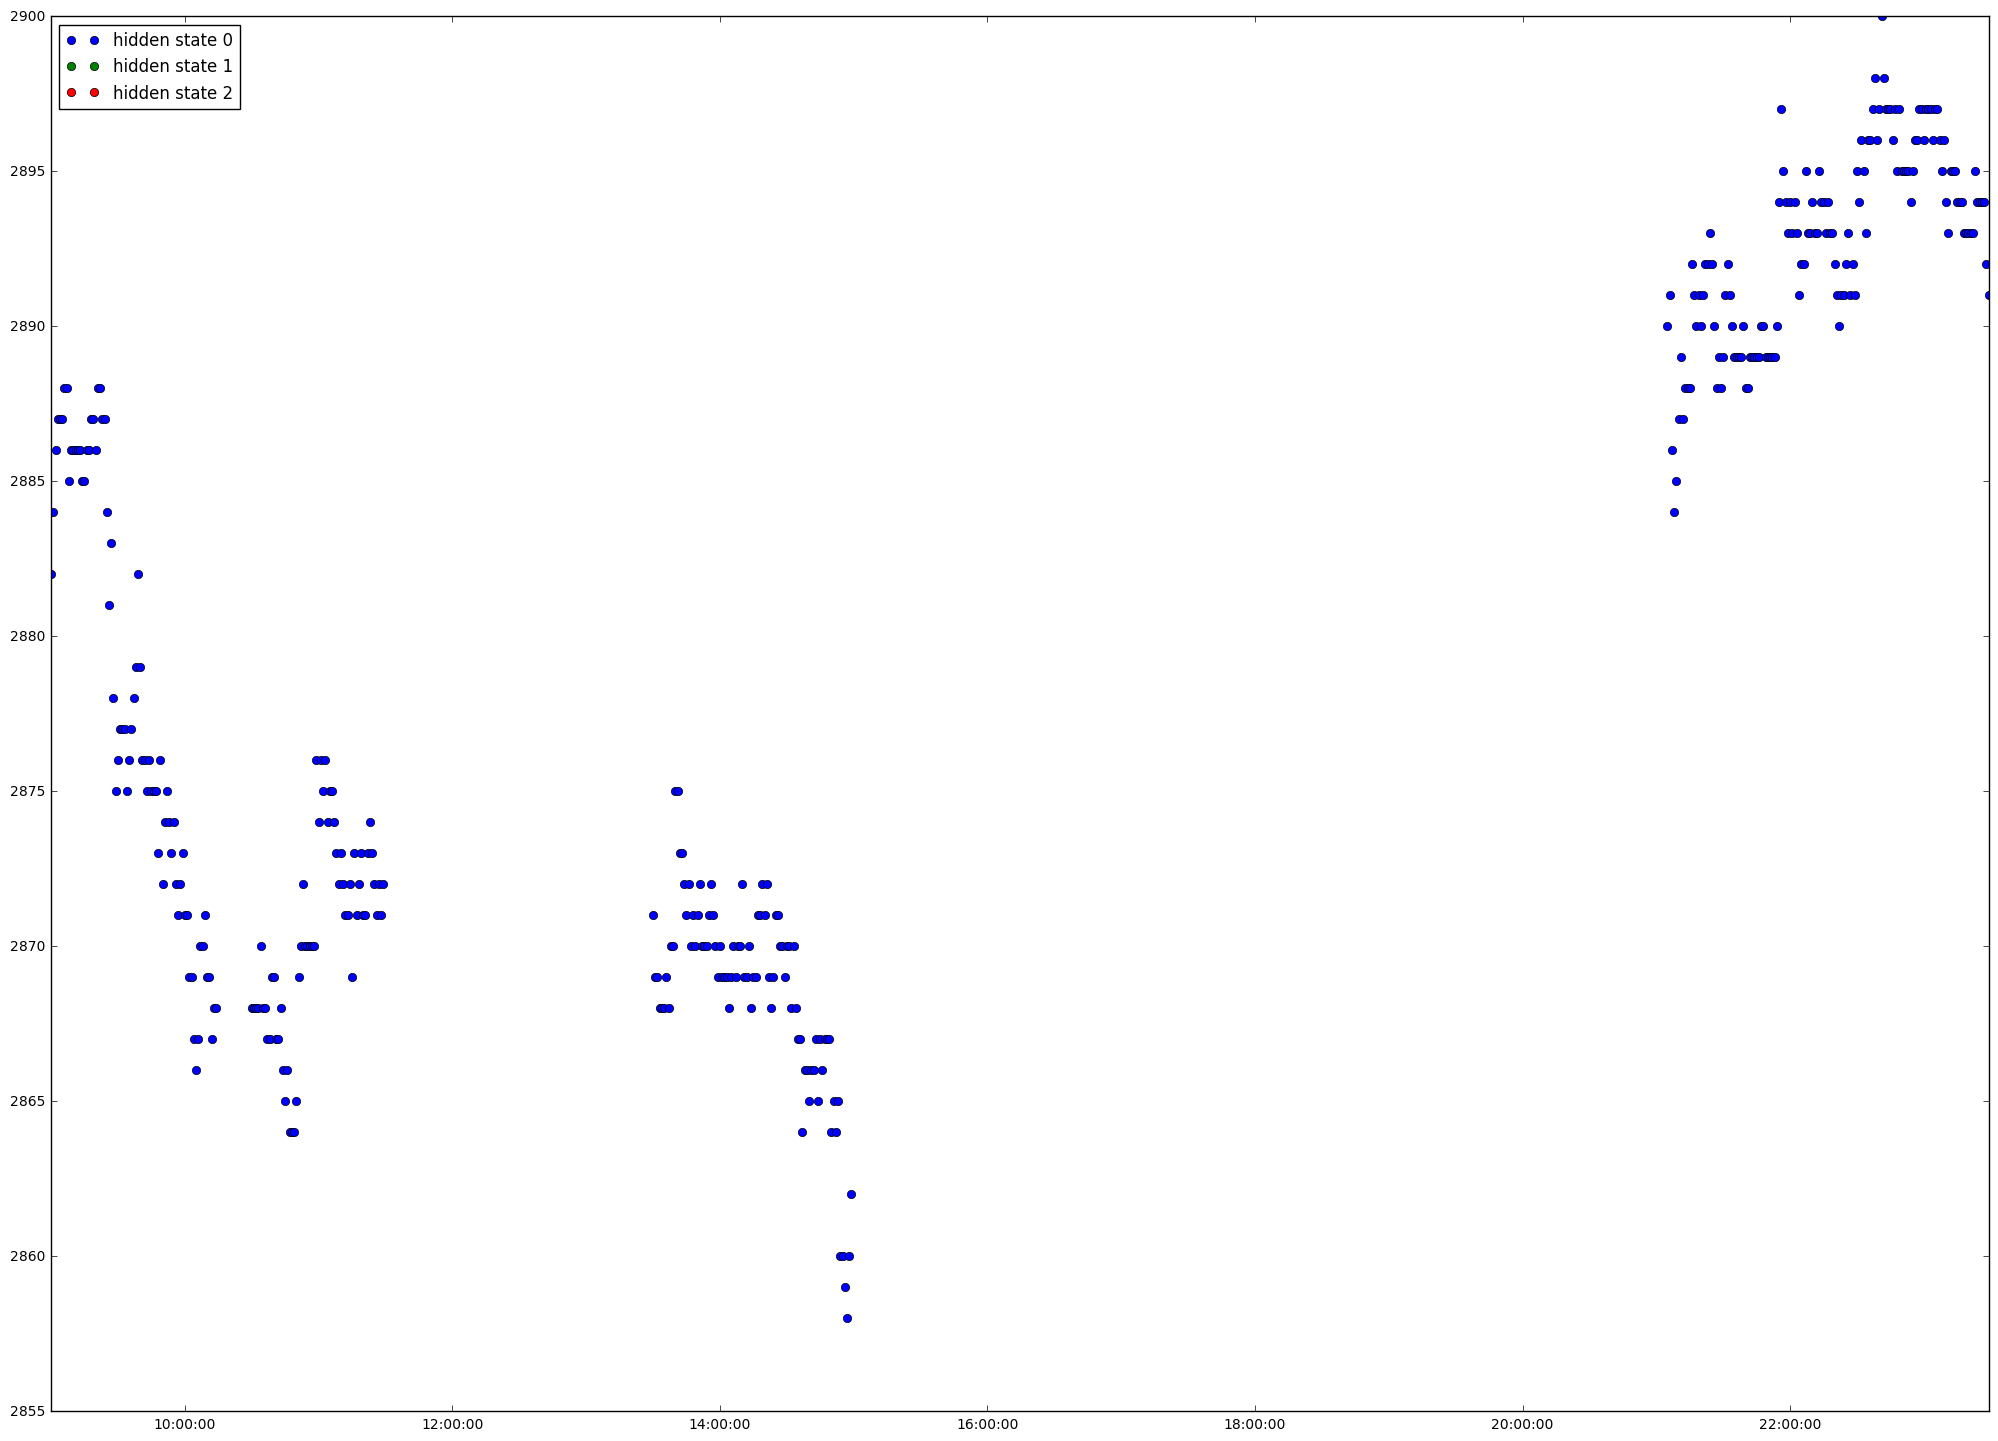

In [486]:
#HMM,网上找的
n = 6 #6个隐藏状态

hmm_df = pd.DataFrame(final_list,columns=['time','openprice','highestprice','lowestprice','closeprice','volume','openinterest'])
#print hmm_df
#拿到每日成交量和收盘价的数据
volume = hmm_df['volume']
close = hmm_df['closeprice']
#计算每日最高最低价格的对数差值，作为特征状态的一个指标。
logDel = np.log(np.array(hmm_df['highestprice']))-np.log(np.array(hmm_df['lowestprice']))
#print logDel
#计算每5日的指数成交量的对数差，作为特征状态的一个指标。
logRet_1 = np.array(np.diff(np.log(close)))#这个作为后面计算收益使用，np diff 当前值减去前一个值，第一个为NaN
#print logRet_1
#print close  #0-374
#print close[5:]  #5-374
#print close[:-5]  #0-369
logRet_5 = np.log(np.array(close[5:])) - np.log(np.array(close[:-5]))
#print logRet_5
#计算每5日的指数成交量的对数差，作为特征状态的一个指标。
logVol_5 = np.log(np.array(volume[5:])) - np.log(np.array(volume[:-5]))
#print logVol_5
#由于计算中出现了以5天为单位的计算，所以要调整特征指标的长度。
logDel = logDel[5:]
logRet_1 = logRet_1[4:]
close = close[5:]
hmm_time = hmm_df['time'][5:]
#把我们的特征状态合并在一起
A = np.column_stack([logDel,logRet_5,logVol_5])

#for line in A:
#    print line
#引用包  pip install hmmlearn
from hmmlearn.hmm import GaussianHMM
model = GaussianHMM(n_components=3,covariance_type="diag",n_iter=2000).fit(A)
#model = GaussianHMM(n_components=6,covariance_type="full",n_iter=2000).fit([A])
#A
#diag：是指在每个马尔可夫隐含状态下，可观察态向量使用对角协方差矩阵。对应协方差矩阵非对角为0，对角值不相等。diag是hmmlearn里面的默认类型。
#full：是指在每个马尔可夫隐含状态下，可观察态向量使用完全协方差矩阵。对应的协方差矩阵里面的元素都是不为零。
hidden_states = model.predict(A)
print hidden_states
plt.figure(figsize=(25,18))
for i in range(model.n_components):
    pos = (hidden_states == i)
    plt.plot_date(hmm_time[pos],close[pos],'o',label='hidden state %d'%i,lw=2)
    plt.legend(loc="left")
plt.show()

In [ ]:
'''
重来，提升胜率为标准
'''

In [502]:
#小时list  13点是30分钟开盘，所以单独判断一下
hour_list = ['21','22','23','09','10','11','13','14']
f_0310_tick = open("./m/20170310_m1705.csv")
line_0310_tick = f_0310_tick.readline()
print line_0310_tick
#行号记录
index_t = 0;
#总数据
total_list_0310 = []
while line_0310_tick:
    
    #每行进行split操作，分隔符是","
    line_data_list = line_0310_tick.split(",")
    #获取时间字符串
    time_string = line_data_list[20] 
    #将时间字符串，进行split操作，%H:%M:%S
    time_list = time_string.split(":")
    
    #定义需要包含的各项数据，从每行tick数据选取
    #获取最新价格
    new_price = int(line_data_list[4])
    #获取数量
    volume = int(line_data_list[11])
    #获取持仓量
    open_interest = int(line_data_list[13])
    
    #买一价
    if line_data_list[22] != '':
        bidprice1 = int(line_data_list[22])
    #卖一量
    if line_data_list[23] != '':
        bidvolume1 = int(line_data_list[23])
    #卖一价
    if line_data_list[24] != '':
        askprice1 = int(line_data_list[24])
    #卖一量
    if line_data_list[25] != '':
        askvolume1 =int(line_data_list[25])
    
    if time_list[0] in hour_list:
        total_list_0310.append([time_string,new_price,volume,open_interest,bidprice1,bidvolume1,askprice1,askvolume1])
        
    line_0310_tick = f_0310_tick.readline()
    index = index + 1
    
f_0310_tick.close()
total_list_0310

20170310,m1705,,,2898,2898,2898,1.64438e+06,1.79769e+308,1.79769e+308,1.79769e+308,0,0,1644378,,,3042,2754,0,0,18:36:21,0,,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170310



[['21:00:00', 2892, 948, 1644252, 2891, 715, 2892, 33],
 ['21:00:00', 2893, 1720, 1644146, 2893, 19, 2894, 75],
 ['21:00:01', 2893, 2190, 1644172, 2892, 73, 2893, 131],
 ['21:00:01', 2892, 2586, 1644316, 2891, 820, 2892, 8],
 ['21:00:02', 2892, 3086, 1644340, 2891, 648, 2892, 54],
 ['21:00:02', 2891, 3480, 1644346, 2891, 485, 2892, 48],
 ['21:00:03', 2891, 4376, 1644722, 2891, 75, 2892, 73],
 ['21:00:03', 2891, 4822, 1644936, 2890, 809, 2891, 90],
 ['21:00:04', 2891, 4984, 1644962, 2890, 838, 2891, 87],
 ['21:00:04', 2890, 5340, 1644858, 2890, 726, 2891, 117],
 ['21:00:05', 2891, 5568, 1644950, 2890, 609, 2891, 248],
 ['21:00:05', 2890, 5940, 1645180, 2890, 448, 2891, 265],
 ['21:00:06', 2890, 6106, 1645270, 2890, 382, 2891, 254],
 ['21:00:06', 2891, 6198, 1645292, 2890, 361, 2891, 252],
 ['21:00:07', 2891, 6384, 1645306, 2890, 316, 2891, 220],
 ['21:00:07', 2890, 6426, 1645286, 2890, 319, 2891, 219],
 ['21:00:08', 2891, 6666, 1645342, 2890, 224, 2891, 222],
 ['21:00:08', 2891, 6718, 1

In [532]:
# 将tick总数据转成dataframe total_list_0310
df_0310 = pd.DataFrame(total_list_0310,columns=["time","price","volume","openinterest","bidprice1","bidvolume1","askprice1","askvolume1"])
volume_avg = np.array((df_0310['bidprice1'] + df_0310['askprice1'])/2.0)
volume_avg_change = np.diff(volume_avg)
#成交量变化 
volume_0310 = df_0310['volume']
volume_change = np.array(np.diff(volume_0310)) # log(volume_0310)  即用 volume_03101[1:] - volume[:-1]
#价格变化 
price_0310 = df_0310['price']
price_change = np.array(np.diff(price_0310)) 
#持仓量的变化
openinterest_0310 = df_0310['openinterest']
openinterest_change = np.array(np.diff(openinterest_0310)) 

new_test_list = []
for i in range(len(price_change)):
    new_test_list.append([total_list_0310[i+1][0],total_list_0310[i+1][1],volume_avg[i+1],volume_avg_change[i],volume_change[i],openinterest_change[i],total_list_0310[i+1][4],total_list_0310[i+1][6],total_list_0310[i+1][5],total_list_0310[i+1][7]])
    print total_list_0310[i+1][0],",",total_list_0310[i+1][1],",",volume_avg[i+1],",",volume_avg_change[i],",",volume_change[i],",",openinterest_change[i],",", \
        total_list_0310[i+1][4],",",total_list_0310[i+1][6],",",total_list_0310[i+1][5],",",total_list_0310[i+1][7]

21:00:00 , 2893 , 2893.5 , 2.0 , 772 , -106 , 2893 , 2894 , 19 , 75
21:00:01 , 2893 , 2892.5 , -1.0 , 470 , 26 , 2892 , 2893 , 73 , 131
21:00:01 , 2892 , 2891.5 , -1.0 , 396 , 144 , 2891 , 2892 , 820 , 8
21:00:02 , 2892 , 2891.5 , 0.0 , 500 , 24 , 2891 , 2892 , 648 , 54
21:00:02 , 2891 , 2891.5 , 0.0 , 394 , 6 , 2891 , 2892 , 485 , 48
21:00:03 , 2891 , 2891.5 , 0.0 , 896 , 376 , 2891 , 2892 , 75 , 73
21:00:03 , 2891 , 2890.5 , -1.0 , 446 , 214 , 2890 , 2891 , 809 , 90
21:00:04 , 2891 , 2890.5 , 0.0 , 162 , 26 , 2890 , 2891 , 838 , 87
21:00:04 , 2890 , 2890.5 , 0.0 , 356 , -104 , 2890 , 2891 , 726 , 117
21:00:05 , 2891 , 2890.5 , 0.0 , 228 , 92 , 2890 , 2891 , 609 , 248
21:00:05 , 2890 , 2890.5 , 0.0 , 372 , 230 , 2890 , 2891 , 448 , 265
21:00:06 , 2890 , 2890.5 , 0.0 , 166 , 90 , 2890 , 2891 , 382 , 254
21:00:06 , 2891 , 2890.5 , 0.0 , 92 , 22 , 2890 , 2891 , 361 , 252
21:00:07 , 2891 , 2890.5 , 0.0 , 186 , 14 , 2890 , 2891 , 316 , 220
21:00:07 , 2890 , 2890.5 , 0.0 , 42 , -20 , 2890 ,

In [561]:
#new_test_df 转成df
new_test_df = pd.DataFrame(new_test_list,columns=["time","price","price_avg","price_avg_diff","volume_diff","openinterest_diff","bidprice1","bidvolume1","askprice1","askvolume1"])
time_array = np.array(new_test_df['time'])
#获取交易量diff 的array
volume_diff_array = np.array(new_test_df['volume_diff'])
#交易量 3个之内的总和 大于1000 ，打印出相关信息
length = 3  #3个之内
total_lab = 1100  #总和1000
#now_length = 0  #当前个数
#now_total = 0 #当前总和
#当前，前两个，前三个。
index = 0
for volume_tick in volume_diff_array:
    #print volume_tick
    #前两个退出
    if index >= length-1:
        total_1 = volume_tick
        total_2 = volume_tick + volume_diff_array[index-1]
        total_3 = volume_tick + volume_diff_array[index-1] + volume_diff_array[index-2]
        #print time_array[index],',',volume_tick,',', volume_diff_array[index-1],',',volume_diff_array[index-2]
        if total_3 > 1100:
            print time_array[index],',',index,',',volume_tick,',', volume_diff_array[index-1],',',volume_diff_array[index-2]
            #直接计算方差
            print (pow(volume_tick-total_3/3,2)+pow(volume_diff_array[index-1]-total_3/3,2) + pow(volume_diff_array[index-2]-total_3/3,2))/3
            #转成log，计算方差,有0元素
            #log_u = (math.log(volume_tick) + math.log(volume_diff_array[index-1]) + math.log(volume_diff_array[index-2]))/3
            #print (pow(math.log(volume_tick)-log_u,2)+pow(math.log(volume_diff_array[index-1])-log_u,2)+pow(math.log(volume_diff_array[index-2])-log_u,2))/3
            #print time_array[index],',',index,',',total_1,',',total_2,',',total_3
    index = index + 1




#逻辑是反的，因为取到了之后的数据
while index <= len(volume_diff_array)-3:
    #print volume_diff_array[index]
    #一次从 第一个，第一个加第二个，第一个加第二个加第三个判断是否大于1000 输出最后一个信息
    if volume_diff_array[index] > total_lab:
        #print time_array[index],',',index,',',1,',',volume_diff_array[index]
        index = index + 1
        continue
    if volume_diff_array[index]+volume_diff_array[index+1] > total_lab:
        #print time_array[index+1],',',index+1,',',2,',',volume_diff_array[index],volume_diff_array[index+1]
        index = index + 1
        continue
    if volume_diff_array[index]+volume_diff_array[index+1]+volume_diff_array[index+2] > total_lab:
        #print time_array[index+2],',',index+2,',',3,',',volume_diff_array[index],volume_diff_array[index+1],volume_diff_array[index+2]
        index = index + 1
        continue        
    index = index + 1


21:00:01 , 2 , 396 , 470 , 772
26450
21:00:02 , 3 , 500 , 396 , 470
1910
21:00:02 , 4 , 394 , 500 , 396
2450
21:00:03 , 5 , 896 , 394 , 500
46673
21:00:03 , 6 , 446 , 896 , 394
50801
21:00:04 , 7 , 162 , 446 , 896
91323
21:00:09 , 18 , 840 , 594 , 52
108358
21:00:10 , 19 , 1864 , 840 , 594
302443
21:00:10 , 20 , 240 , 1864 , 840
449550
21:00:11 , 21 , 236 , 240 , 1864
587530
21:00:12 , 24 , 446 , 462 , 200
14379
21:04:47 , 564 , 634 , 292 , 212
33494
21:06:14 , 736 , 1072 , 10 , 124
226616
21:07:08 , 842 , 562 , 4 , 542
66801
21:07:09 , 844 , 1442 , 220 , 562
264961
21:07:09 , 845 , 4 , 1442 , 220
400865
21:07:10 , 846 , 58 , 4 , 1442
442913
21:07:39 , 904 , 298 , 494 , 390
6410
21:07:40 , 905 , 402 , 298 , 494
6410
21:07:40 , 906 , 844 , 402 , 298
56033
21:07:41 , 907 , 664 , 844 , 402
32934
21:07:41 , 908 , 214 , 664 , 844
70200
21:07:42 , 909 , 546 , 214 , 664
36294
21:07:42 , 910 , 1326 , 546 , 214
217241
21:07:43 , 911 , 1028 , 1326 , 546
103281
21:07:43 , 912 , 394 , 1028 , 1326


In [565]:
new_test_df[new_test_df['volume_diff'] > 900]

time  price  price_avg  price_avg_diff  volume_diff  \
19     21:00:10   2889     2888.5            -1.0         1864   
736    21:06:14   2891     2891.5             1.0         1072   
844    21:07:09   2890     2889.5             1.0         1442   
910    21:07:42   2885     2885.5            -1.0         1326   
911    21:07:43   2886     2885.5             0.0         1028   
913    21:07:44   2885     2884.5            -1.0         1658   
1110   21:09:22   2886     2886.5             1.0         1428   
1403   21:11:51   2888     2888.5             1.0         1018   
1496   21:12:38   2888     2888.5             1.0         1190   
1614   21:13:39   2887     2887.5             1.0         1132   
1745   21:14:51   2888     2888.5             1.0          926   
3104   21:27:10   2889     2889.5            -1.0         1246   
3561   21:31:09   2890     2890.0             0.5         1482   
3891   21:34:10   2890     2889.5            -1.0         1106   
5142   21:47:09   2891     2890.5             1.0         1134   
5746   21:54:16   2889     2889.5             0.0          930   
5796   21:54:58   2890     2890.5             1.0         1068   
5830   21:55:15   2892     2892.5             1.0          930   
5875   21:55:38   2895     2894.5             0.0          970   
6014   21:56:48   2896     2896.5             0.0         1028   
7712   22:13:54   2894     2894.5             1.0          926   
8397   22:22:07   2890     2890.5            -1.0         2042   
9616   22:34:30   2894     2893.5            -1.0         1250   
10170  22:39:17   2896     2895.5            -1.0         1112   
10478  22:41:57   2899     2899.5             1.0         1096   
10686  22:43:46   2897     2896.5            -1.0         1234   
13577  23:15:50   2894     2893.5            -1.0         1022   
14836  09:00:00   2884     2884.5            -6.0         5334   
14837  09:00:00   2884     2884.5             0.0         1802   
14838  09:00:01   2884     2884.5             0.0         1704   
...         ...    ...        ...             ...          ...   
26322  10:59:47   2875     2875.5             2.0         2030   
26538  11:01:39   2876     2876.5             1.0         1024   
27112  11:07:18   2874     2874.5             0.0         1086   
27926  11:15:17   2871     2870.5             0.0          962   
28066  11:16:38   2872     2872.5             1.0         1116   
28951  11:27:01   2871     2871.5             0.0         1334   
31415  13:52:38   2871     2871.5             0.0         1174   
32200  14:01:33   2869     2868.5             0.0         1008   
34204  14:22:37   2870     2869.5            -1.0         1060   
34414  14:25:09   2870     2870.0             0.5         1166   
35195  14:35:15   2868     2868.5             0.0         1000   
35469  14:37:40   2866     2865.5            -1.0          936   
35489  14:37:50   2865     2864.5            -1.0         1040   
36862  14:50:08   2865     2865.5            -1.0         1404   
37363  14:54:27   2863     2863.5            -1.0         4236   
37364  14:54:28   2862     2862.5            -1.0         4222   
37365  14:54:28   2861     2861.5            -1.0         2330   
37366  14:54:29   2861     2861.5             0.0         1114   
37371  14:54:31   2862     2861.5            -1.0         4378   
37372  14:54:32   2861     2861.0            -0.5         2170   
37379  14:54:35   2860     2861.5             0.0         2008   
37380  14:54:36   2860     2860.5            -1.0         2932   
37441  14:55:06   2860     2860.5             0.0         2226   
37442  14:55:07   2860     2859.5            -1.0         4094   
37464  14:55:18   2859     2859.5             0.0         2136   
37711  14:57:22   2859     2858.5            -0.5         1206   
37715  14:57:24   2859     2858.5             0.0         1010   
37718  14:57:26   2859     2858.5             0.0         1354   
37840  14:58:27   2857     2857.0            -0.5  

In [2]:
#pair trading

In [22]:
#测试测试
#把 m和rm 的所有平均价格弄出来
#小时list  13点是30分钟开盘，所以单独判断一下

#hour_list = ['21','22','23','09','10','11','13','14']
hour_list = ['09','10','11','13','14']
f_0321m_tick = open("./mrm/20170321_m1709.csv")
line_0321m_tick = f_0321m_tick.readline()
print line_0321m_tick
#行号记录
index_t = 0;
#总数据
total_list_0321m = []
while line_0321m_tick:
    
    #每行进行split操作，分隔符是","
    line_data_list = line_0321m_tick.split(",")
    #获取时间字符串
    time_string = line_data_list[20] 
    #将时间字符串，进行split操作，%H:%M:%S
    time_list = time_string.split(":")
    
    #定义需要包含的各项数据，从每行tick数据选取
    #获取最新价格
    new_price = int(line_data_list[4])
    #获取数量
    volume = int(line_data_list[11])
    #获取持仓量
    open_interest = int(line_data_list[13])
    
    #买一价
    if line_data_list[22] != '':
        bidprice1 = int(line_data_list[22])
    #卖一量
    if line_data_list[23] != '':
        bidvolume1 = int(line_data_list[23])
    #卖一价
    if line_data_list[24] != '':
        askprice1 = int(line_data_list[24])
    #卖一量
    if line_data_list[25] != '':
        askvolume1 =int(line_data_list[25])
    
    if time_list[0] in hour_list:
        total_list_0321m.append([time_string,new_price,volume,open_interest,bidprice1,bidvolume1,askprice1,askvolume1])
        
    line_0321m_tick = f_0321m_tick.readline()
    index_t = index_t + 1
    
f_0321m_tick.close()
total_list_0321m

20170321,m1709,,,2907,2895,2907,1.74537e+06,1.79769e+308,1.79769e+308,1.79769e+308,0,0,1745374,,,3039,2751,0,0,18:37:13,0,,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170321



[['09:00:00', 2903, 501338, 1816878, 2903, 7, 2904, 507],
 ['09:00:00', 2901, 501498, 1816858, 2901, 780, 2903, 77],
 ['09:00:01', 2901, 501846, 1816884, 2901, 635, 2903, 141],
 ['09:00:01', 2901, 502098, 1816862, 2901, 589, 2902, 4],
 ['09:00:02', 2901, 502696, 1816598, 2901, 388, 2903, 162],
 ['09:00:02', 2901, 503100, 1816488, 2901, 272, 2902, 3],
 ['09:00:03', 2901, 503258, 1816496, 2901, 213, 2902, 149],
 ['09:00:03', 2902, 503524, 1816572, 2901, 101, 2902, 160],
 ['09:00:04', 2901, 503758, 1816738, 2900, 1671, 2901, 62],
 ['09:00:04', 2900, 503798, 1816752, 2900, 1652, 2901, 287],
 ['09:00:05', 2900, 504872, 1816642, 2900, 1090, 2901, 274],
 ['09:00:05', 2900, 505190, 1816584, 2900, 932, 2901, 281],
 ['09:00:06', 2900, 505236, 1816600, 2900, 909, 2901, 341],
 ['09:00:06', 2899, 507216, 1815516, 2899, 138, 2900, 30],
 ['09:00:07', 2899, 507648, 1815322, 2898, 288, 2899, 149],
 ['09:00:07', 2898, 507882, 1815184, 2898, 189, 2899, 281],
 ['09:00:08', 2898, 508168, 1815222, 2897, 134

In [23]:
#hour_list = ['21','22','23','09','10','11','13','14']
hour_list = ['09','10','11','13','14']
#大商前天晚上的夜盘和白天数据在一起，郑商当天白天数据和当晚夜盘在一起，都取白天数据
#豆粕和菜粕有0.65的相关性
f_0321rm_tick = open("./mrm/20170321_RM709.csv")
#f_0321rm_tick = open("./mrm/20170321_a1709.csv")
#f_0321rm_tick = open("./mrm/20170321_y1709.csv")
line_0321rm_tick = f_0321rm_tick.readline()
print line_0321rm_tick
#行号记录
index_t = 0;
#总数据
total_list_0321rm = []
while line_0321rm_tick:
    
    #每行进行split操作，分隔符是","
    line_data_list = line_0321rm_tick.split(",")
    #获取时间字符串
    time_string = line_data_list[20] 
    #将时间字符串，进行split操作，%H:%M:%S
    time_list = time_string.split(":")
    
    #定义需要包含的各项数据，从每行tick数据选取
    #获取最新价格
    new_price = int(line_data_list[4])
    #获取数量
    volume = int(line_data_list[11])
    #获取持仓量
    open_interest = int(line_data_list[13])
    
    #买一价
    if line_data_list[22] != '':
        bidprice1 = int(line_data_list[22])
    #买一量
    if line_data_list[23] != '':
        bidvolume1 = int(line_data_list[23])
    #卖一价
    if line_data_list[24] != '':
        askprice1 = int(line_data_list[24])
    #卖一量
    if line_data_list[25] != '':
        askvolume1 =int(line_data_list[25])
    
    if time_list[0] in hour_list:
        total_list_0321rm.append([time_string,new_price,volume,open_interest,bidprice1,bidvolume1,askprice1,askvolume1])
        
    line_0321rm_tick = f_0321rm_tick.readline()
    index_t = index_t + 1
    
f_0321rm_tick.close()
total_list_0321rm

20170321,RM709,,,2432,2416,2434,539272,2429,2445,2427,187832,457746584,563800,2432,2437,2537,2295,0,0,23:29:59,0,2431,77,2432,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2437,20170321



[['09:00:00', 2431, 187902, 563814, 2431, 42, 2432, 1],
 ['09:00:00', 2429, 188540, 563758, 2428, 182, 2429, 6],
 ['09:00:01', 2428, 188772, 563816, 2428, 151, 2429, 7],
 ['09:00:01', 2428, 188936, 563850, 2428, 97, 2429, 100],
 ['09:00:02', 2429, 189262, 563818, 2427, 99, 2429, 67],
 ['09:00:02', 2427, 189486, 563838, 2427, 16, 2428, 3],
 ['09:00:03', 2426, 189668, 563828, 2426, 115, 2428, 13],
 ['09:00:03', 2427, 189888, 563736, 2426, 33, 2427, 15],
 ['09:00:04', 2427, 189942, 563740, 2426, 23, 2427, 4],
 ['09:00:04', 2428, 189972, 563746, 2427, 1, 2428, 10],
 ['09:00:05', 2426, 189990, 563740, 2426, 30, 2427, 2],
 ['09:00:05', 2427, 190006, 563736, 2426, 26, 2427, 31],
 ['09:00:06', 2427, 190072, 563686, 2426, 17, 2427, 26],
 ['09:00:06', 2425, 190116, 563694, 2425, 279, 2427, 32],
 ['09:00:07', 2425, 190310, 563658, 2425, 211, 2426, 9],
 ['09:00:07', 2426, 190692, 563508, 2426, 28, 2427, 26],
 ['09:00:08', 2425, 190890, 563424, 2424, 138, 2426, 8],
 ['09:00:08', 2426, 190910, 56342

In [24]:
print len(total_list_0321m)
print len(total_list_0321rm)
#取数据的每分钟的 00秒，创建新的list
total_list_0321m_00 = []
total_list_0321rm_00 = []
tmp_min = ''
for data in total_list_0321m:
    time_list = data[0].split(":")
    #当前分钟数不等于上一个分钟数
    if time_list[1] != tmp_min:
        if time_list[0]+time_list[1] != '1015' and time_list[0]+time_list[1] != '1130':
            total_list_0321m_00.append([time_list[0]+':'+time_list[1],(data[4]+data[6])/2.])
            tmp_min = time_list[1]
for data in total_list_0321rm:
    time_list = data[0].split(":")
    #当前分钟数不等于上一个分钟数
    if time_list[1] != tmp_min:
        if time_list[0]+time_list[1] != '1015' and time_list[0]+time_list[1] != '1130':
            total_list_0321rm_00.append([time_list[0]+':'+time_list[1],(data[4]+data[6])/2.])
            tmp_min = time_list[1]
            
len(total_list_0321m_00)
len(total_list_0321rm_00)

22273
19513


225

In [25]:
df_m_0321 = pd.DataFrame(total_list_0321m_00)
df_rm_0321 = pd.DataFrame(total_list_0321rm_00)
m_array = np.array(df_m_0321[1])
rm_array = np.array(df_rm_0321[1])
m_array_returns = np.diff(m_array) / m_array[:-1]
rm_array_returns = np.diff(rm_array) / rm_array[:-1]
m_logreturns = np.diff(np.log(m_array))
rm_logreturns = np.diff(np.log(rm_array))

In [26]:
covariance = np.cov(m_array_returns,rm_array_returns)
print "Covariance ",covariance
print "Covariance diagonal",covariance.diagonal()
print "Covariance trace",covariance.trace()
print covariance / (m_array_returns.std() * rm_array_returns.std())
print "Correlation coefficient",np.corrcoef(m_array_returns,rm_array_returns)

Covariance  [[  1.21407850e-07   1.13201965e-07]
 [  1.13201965e-07   2.52405811e-07]]
Covariance diagonal [  1.21407850e-07   2.52405811e-07]
Covariance trace 3.73813660963e-07
[[ 0.69665356  0.64956716]
 [ 0.64956716  1.4483364 ]]
Correlation coefficient [[ 1.          0.64666731]
 [ 0.64666731  1.        ]]


In [27]:
covariance = np.cov(m_logreturns,rm_logreturns)
print "Covariance ",covariance
print "Covariance diagonal",covariance.diagonal()
print "Covariance trace",covariance.trace()
print covariance / (m_logreturns.std() * rm_logreturns.std())
print "Correlation coefficient",np.corrcoef(m_logreturns,rm_logreturns)

Covariance  [[  1.21507588e-07   1.13268850e-07]
 [  1.13268850e-07   2.52444367e-07]]
Covariance diagonal [  1.21507588e-07   2.52444367e-07]
Covariance trace 3.73951955638e-07
[[ 0.69688644  0.64963454]
 [ 0.64963454  1.44785242]]
Correlation coefficient [[ 1.          0.64673438]
 [ 0.64673438  1.        ]]


In [ ]:
#对应数据分析

In [ ]:
#主要思路，就是用买卖一档的平均值，用m的减去RM，得到差值，记录相应的信息

In [49]:
f_mrm_tick = open("./mrm/mrm/20170322.csv")
f_mrm_tick_line = f_mrm_tick.readline()
index = 0
m_tmp_line = []
RM_tmp_line = []
m_avg = 0
RM_avg = 0
diff_price_list = []
while f_mrm_tick_line:
    #print index,",",f_mrm_tick_line
    line_data_list = f_mrm_tick_line.split(",")
    #判断是m1709还是RM709
    if line_data_list[1] == "m1709":
        #判断买一卖一都不为空
        if line_data_list[22] != None and  line_data_list[24] != None:
            m_avg = (int(line_data_list[22]) + int(line_data_list[24]))/2.0
            #print m_avg
            m_tmp_line = line_data_list
    if line_data_list[1] == "RM709":
        #判断买一卖一都不为空
        if line_data_list[22] != None and  line_data_list[24] != None:
            RM_avg = (int(line_data_list[22]) + int(line_data_list[24]))/2.0
            #print RM_avg
            RM_tmp_line = line_data_list
    if m_avg != 0 and RM_avg != 0:
        #print (m_avg-RM_avg),',',m_tmp_line[22],',',m_tmp_line[24],',',m_tmp_line[23],',',m_tmp_line[25],',',RM_tmp_line[22],',',RM_tmp_line[24],',',RM_tmp_line[23],',',RM_tmp_line[25]
        diff_price_list.append([(m_avg-RM_avg),m_tmp_line[22],m_tmp_line[24],m_tmp_line[23],m_tmp_line[25],RM_tmp_line[22],RM_tmp_line[24],RM_tmp_line[23],RM_tmp_line[25]])
    f_mrm_tick_line = f_mrm_tick.readline()
    index = index + 1
    
index

17252

In [50]:
for i in diff_price_list:
    print i

[469.0, '2878', '2879', '617', '275', '2409', '2410', '234', '71']
[469.0, '2878', '2879', '582', '253', '2409', '2410', '234', '71']
[468.0, '2878', '2879', '582', '253', '2410', '2411', '25', '73']
[468.0, '2878', '2879', '546', '288', '2410', '2411', '25', '73']
[468.0, '2878', '2879', '546', '288', '2410', '2411', '5', '53']
[468.0, '2878', '2879', '415', '286', '2410', '2411', '5', '53']
[468.0, '2878', '2879', '415', '286', '2410', '2411', '3', '32']
[468.0, '2878', '2879', '456', '284', '2410', '2411', '3', '32']
[468.0, '2878', '2879', '456', '284', '2410', '2411', '31', '40']
[468.0, '2878', '2879', '439', '284', '2410', '2411', '31', '40']
[468.0, '2878', '2879', '439', '284', '2410', '2411', '28', '41']
[468.0, '2878', '2879', '451', '288', '2410', '2411', '28', '41']
[468.0, '2878', '2879', '451', '288', '2410', '2411', '15', '40']
[468.0, '2878', '2879', '396', '283', '2410', '2411', '15', '40']
[467.5, '2878', '2879', '396', '283', '2410', '2412', '16', '101']
[467.5, '28

In [60]:
diff_price_df = pd.DataFrame(diff_price_list,columns=['diffprice','mbidprice','maskprice','mbidvol','maskvol','RMbidprice','RMaskprice','RMbidvol','RMaskvol']) 
print 'diff_price_df.shape: ',diff_price_df.shape
diff_price_df
diff_price_array = np.array(diff_price_df['diffprice'])
np.unique(diff_price_array)


diff_price_df.shape:  (17251, 9)


array([ 462. ,  462.5,  463. ,  463.5,  464. ,  464.5,  465. ,  465.5,
        466. ,  466.5,  467. ,  467.5,  468. ,  468.5,  469. ,  469.5,
        470. ,  470.5,  471. ])